In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage


# EDA

In [2]:
df = pd.read_excel("Random data set_customers.xlsx")

In [3]:
df.head()

,CustomerId (Anonymized),PolicyId\n(Anonymized),Sub Branch,Branch,Product,Effective Data,Premium,Intermediated Policy,Contracting Channel,Personal Data Protection,Direct Debit,N Claims,Claim Cost,Person Type,Age,Tenure,Gender,Client Segmentation,Client Area
0,NaN,POL001,Group health,Health,Group health,2018-12-01,1958,1,Agents,NaN,0,39.0,2443.66,Individual,50.0,NaN,NaN,Gold,NaN
1,NaN,POL002,Group health,Health,Group health,2018-01-08,2681,1,Agents,NaN,0,1.0,65.15,Individual,22.0,NaN,Female,Gold,NaN
2,NaN,POL003,Group health,Health,Group health,2017-08-11,2599,1,Agents,NaN,0,3.0,2779.00,Individual,75.0,NaN,NaN,Silver,NaN
3,NaN,POL004,Group health,Health,Group health,2019-09-02,1295,1,Agents,NaN,0,0.0,0.00,Individual,42.0,NaN,NaN,Silver,NaN
4,NaN,POL005,Group health,Health,Group health,2019-01-12,427,1,Agents,NaN,0,0.0,0.00,Individual,68.0,NaN,NaN,Silver,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218637 entries, 0 to 218636
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   CustomerId (Anonymized)   202171 non-null  object        
 1   PolicyId
(Anonymized)     218637 non-null  object        
 2   Sub Branch                218637 non-null  object        
 3   Branch                    218635 non-null  object        
 4   Product                   218637 non-null  object        
 5   Effective Data            218637 non-null  datetime64[ns]
 6   Premium                   218637 non-null  int64         
 7   Intermediated Policy      218637 non-null  int64         
 8   Contracting Channel       218637 non-null  object        
 9   Personal Data Protection  177902 non-null  object        
 10  Direct Debit              218637 non-null  int64         
 11  N Claims                  218334 non-null  float64       
 12  Cl

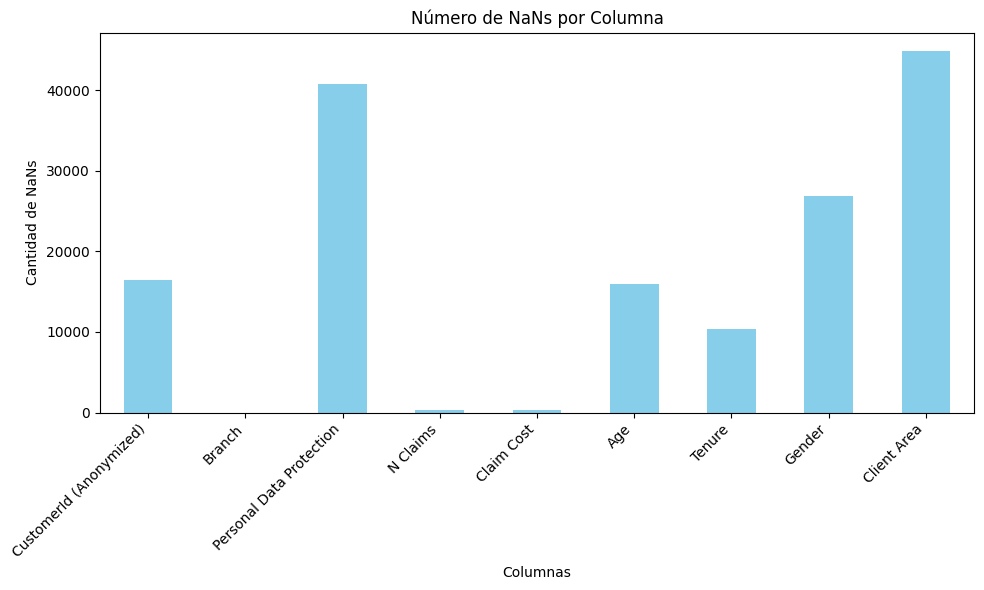

In [5]:
nan_counts = df.isna().sum()
nan_counts = nan_counts[nan_counts > 0]

plt.figure(figsize=(10, 6))
nan_counts.plot(kind='bar', color='skyblue')
plt.title('Número de NaNs por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de NaNs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
df

,CustomerId (Anonymized),PolicyId\n(Anonymized),Sub Branch,Branch,Product,Effective Data,Premium,Intermediated Policy,Contracting Channel,Personal Data Protection,Direct Debit,N Claims,Claim Cost,Person Type,Age,Tenure,Gender,Client Segmentation,Client Area
0,NaN,POL001,Group health,Health,Group health,2018-12-01,1958,1,Agents,NaN,0,39.0,2443.66,Individual,50.0,NaN,NaN,Gold,NaN
1,NaN,POL002,Group health,Health,Group health,2018-01-08,2681,1,Agents,NaN,0,1.0,65.15,Individual,22.0,NaN,Female,Gold,NaN
2,NaN,POL003,Group health,Health,Group health,2017-08-11,2599,1,Agents,NaN,0,3.0,2779.00,Individual,75.0,NaN,NaN,Silver,NaN
3,NaN,POL004,Group health,Health,Group health,2019-09-02,1295,1,Agents,NaN,0,0.0,0.00,Individual,42.0,NaN,NaN,Silver,NaN
4,NaN,POL005,Group health,Health,Group health,2019-01-12,427,1,Agents,NaN,0,0.0,0.00,Individual,68.0,NaN,NaN,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218632,NaN,POL218611,Group health,Health,Group health,2016-03-06,75,1,Agents,NaN,0,0.0,0.00,Individual,40.0,0.0,Female,Silver,NaN
218633,CLIENT92539,POL218612,Individual health,Health,In-patient & Out-patient,2020-11-26,26,1,TIIs,NaN,0,0.0,0.00,Individual,32.0,3.0,Female,Gold,NaN
218634,NaN,POL218613,Individual health,Health,Individual health,2019-12-14,513,1,Agents,NaN,0,0.0,0.00,Individual,79.0,1.0,Female,Silver,NaN
218635,NaN,POL218614,Individual health,Health,Individual health,2016-10-27,1689,1,Agents,NaN,0,0.0,0.00,Individual,28.0,0.0,Male,Silver,NaN


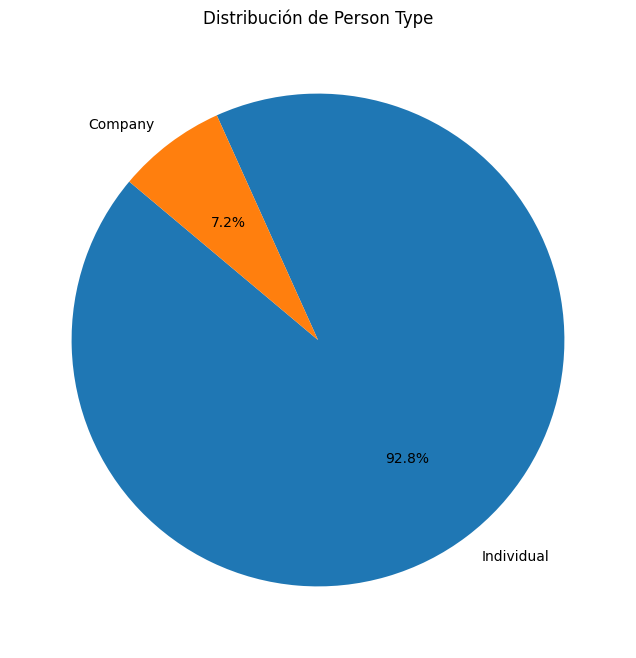

In [10]:
plt.figure(figsize=(8, 8))
df['Person Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Person Type')
plt.ylabel('')
plt.show()


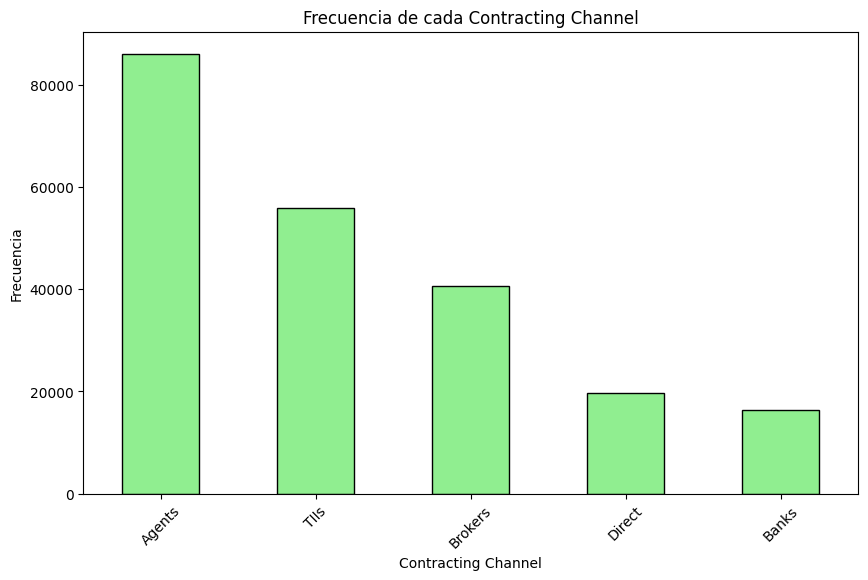

In [11]:
plt.figure(figsize=(10, 6))
df['Contracting Channel'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Frecuencia de cada Contracting Channel')
plt.xlabel('Contracting Channel')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


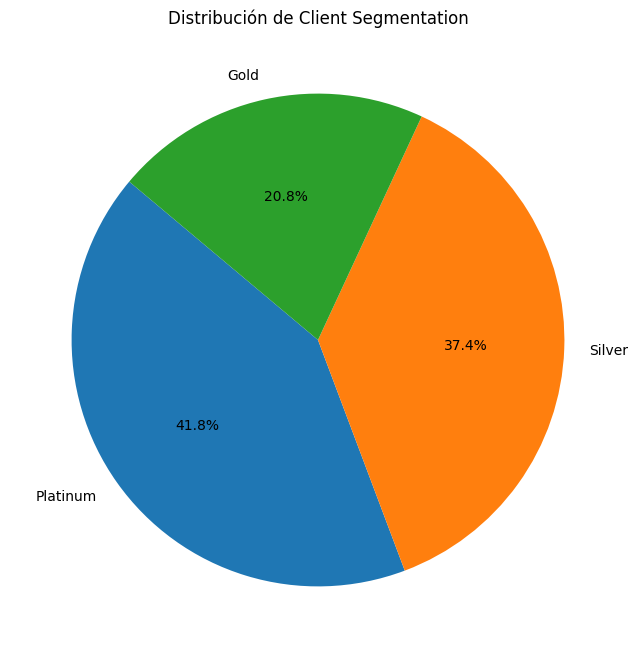

In [13]:
plt.figure(figsize=(8, 8))
df['Client Segmentation'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Client Segmentation')
plt.ylabel('')
plt.show()


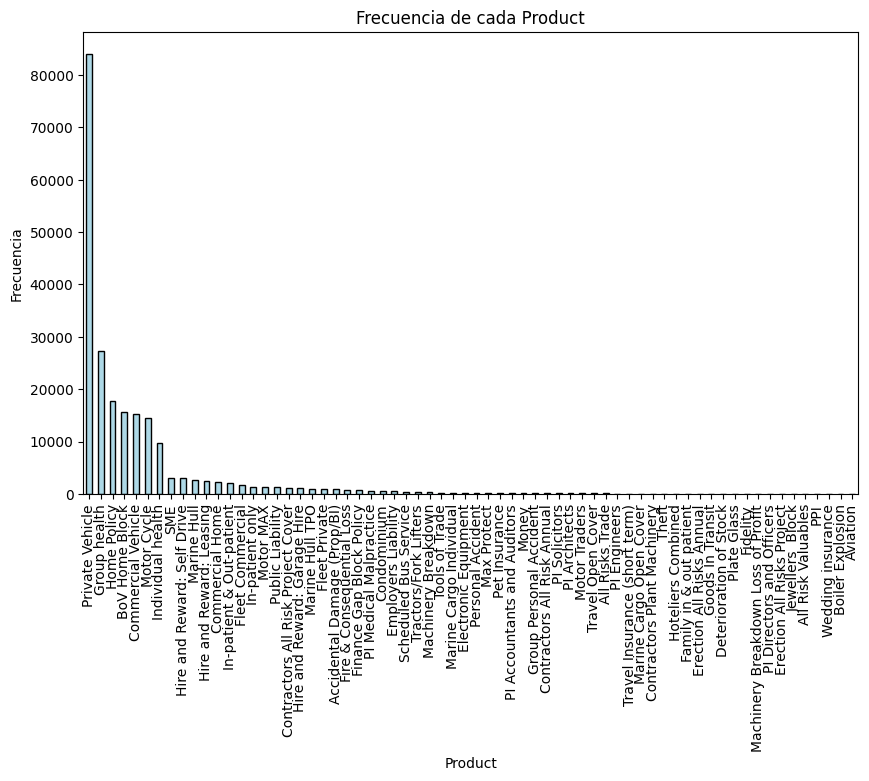

In [14]:
plt.figure(figsize=(10, 6))
df['Product'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Frecuencia de cada Product')
plt.xlabel('Product')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


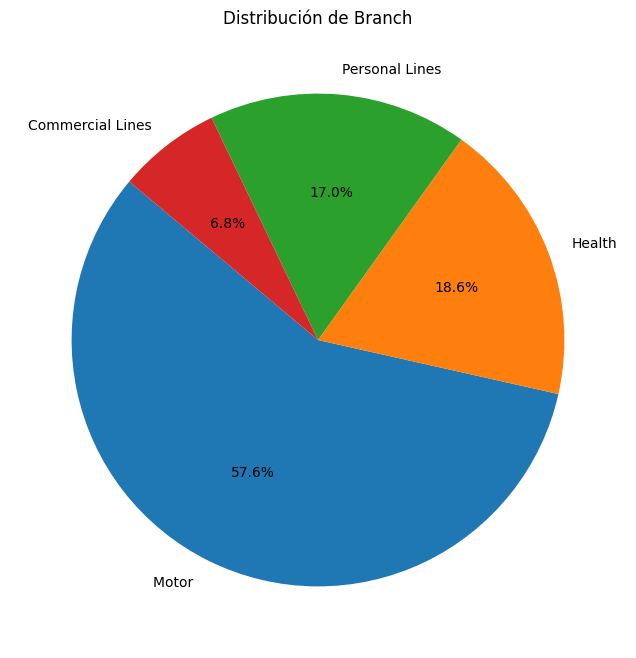

In [15]:
plt.figure(figsize=(8, 8))
df['Branch'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Branch')
plt.ylabel('')
plt.show()


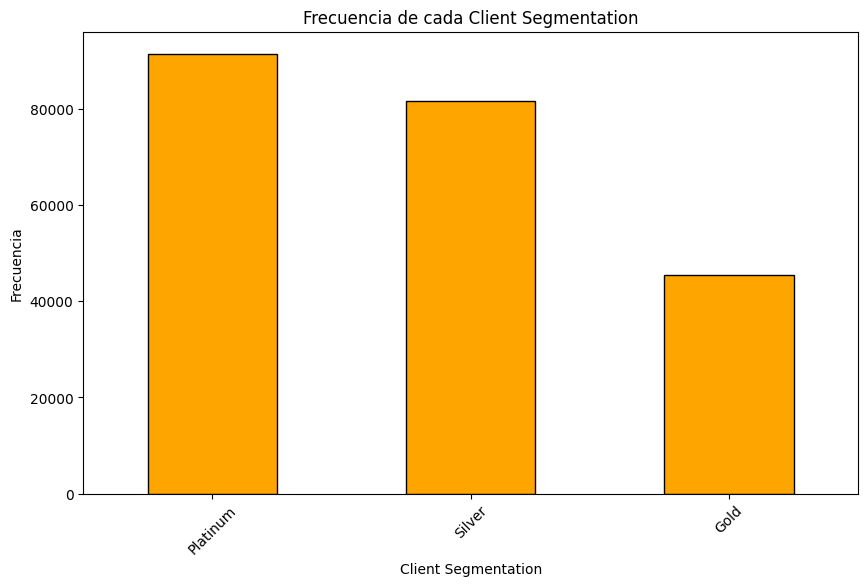

In [16]:
plt.figure(figsize=(10, 6))
df['Client Segmentation'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Frecuencia de cada Client Segmentation')
plt.xlabel('Client Segmentation')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


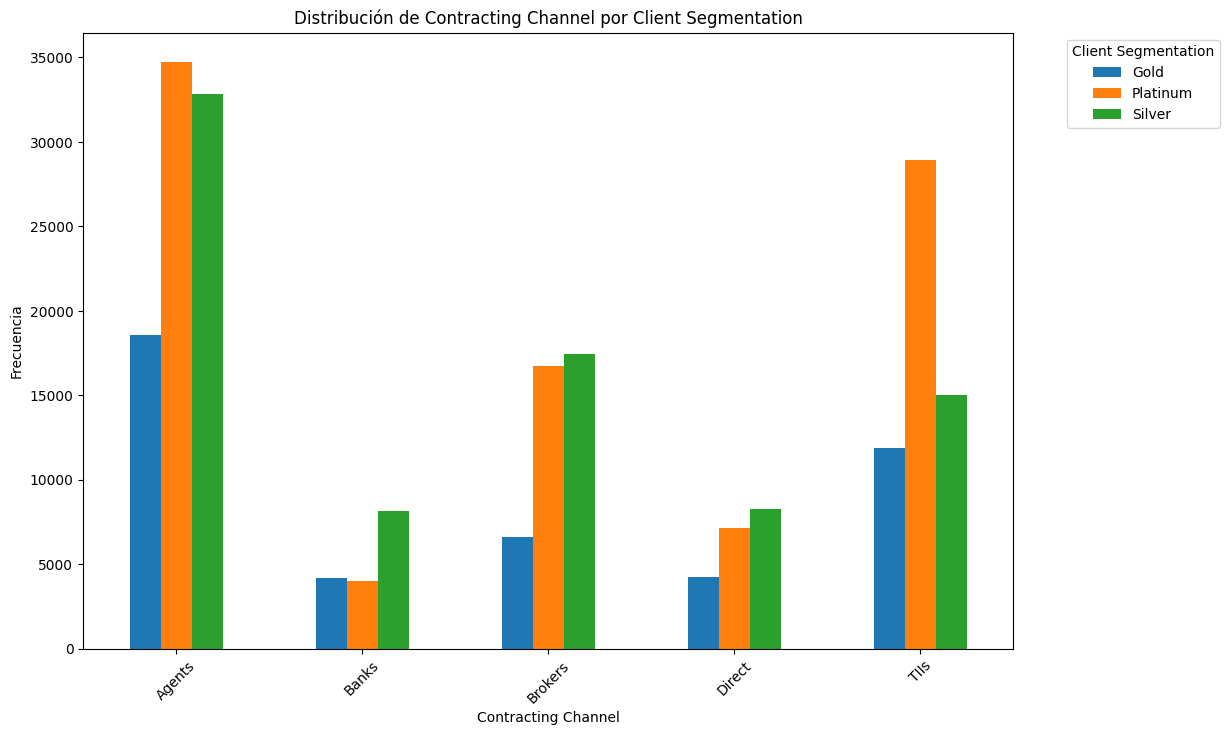

In [30]:
# Gráfico de barras apiladas separado por 'Client Segmentation', pero cada 'Contracting Channel' mostrando tres barras separadas por 'Client Segmentation'
df_grouped = df.groupby(['Contracting Channel', 'Client Segmentation']).size().unstack().fillna(0)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 8))
df_grouped.plot(kind='bar', ax=ax)

# Colocar la leyenda fuera del gráfico
ax.legend(title='Client Segmentation', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribución de Contracting Channel por Client Segmentation')
plt.xlabel('Contracting Channel')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

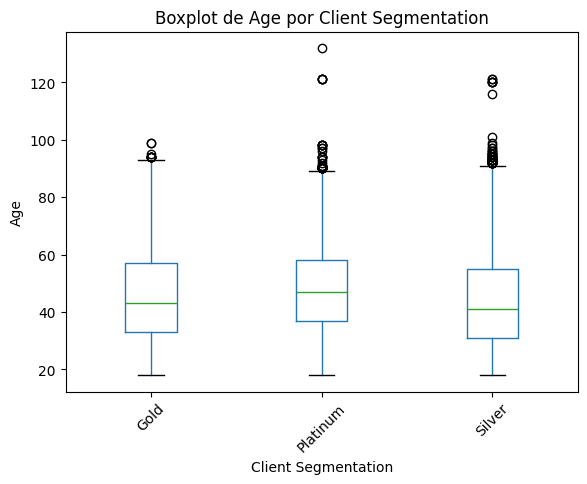

In [18]:
plt.figure(figsize=(12, 8))
df.boxplot(column=['Age'], by='Client Segmentation', grid=False)
plt.title('Boxplot de Age por Client Segmentation')
plt.suptitle('')  # Suprimir el título automático de pandas
plt.xlabel('Client Segmentation')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


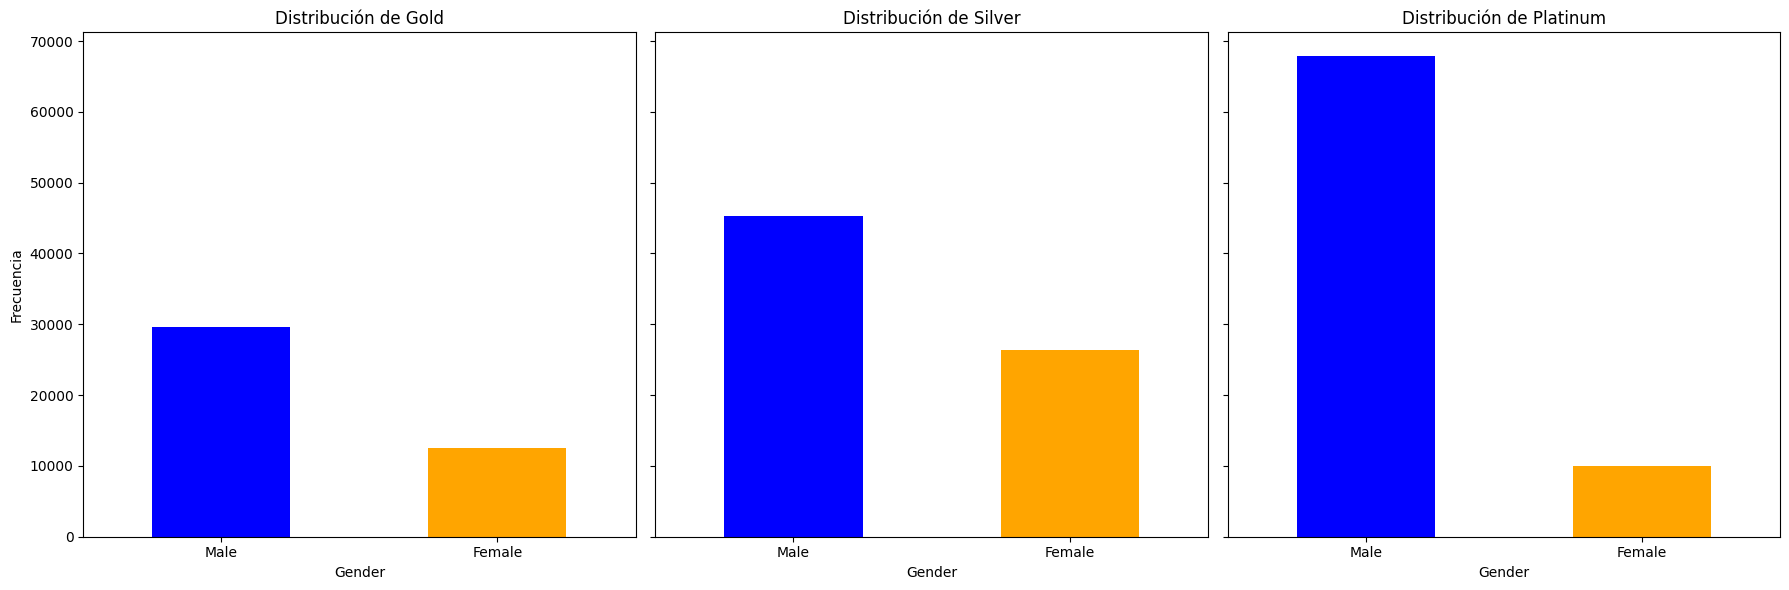

In [32]:
# Gráfico de barras separado para cada grupo de 'Client Segmentation' por 'Gender'
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

segmentation_types = df['Client Segmentation'].unique()

for ax, segmentation in zip(axes, segmentation_types):
    data = df[df['Client Segmentation'] == segmentation]['Gender'].value_counts()
    data.plot(kind='bar', ax=ax, color=['blue', 'orange'])
    ax.set_title(f'Distribución de {segmentation}')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Frecuencia')
    ax.set_xticklabels(data.index, rotation=0)

plt.tight_layout()
plt.show()


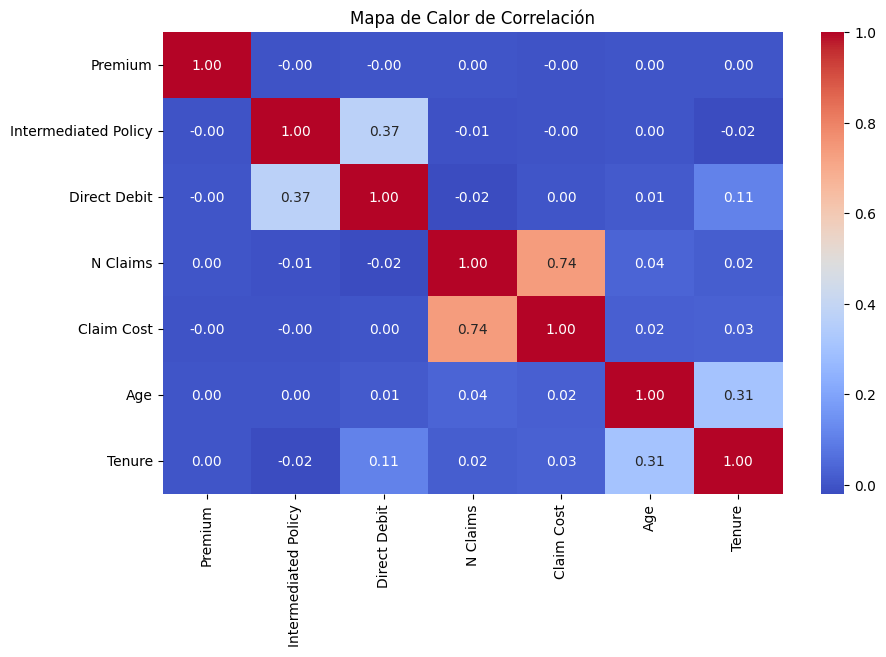

In [39]:
# Seleccionar solo las columnas numéricas
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Generar el mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()


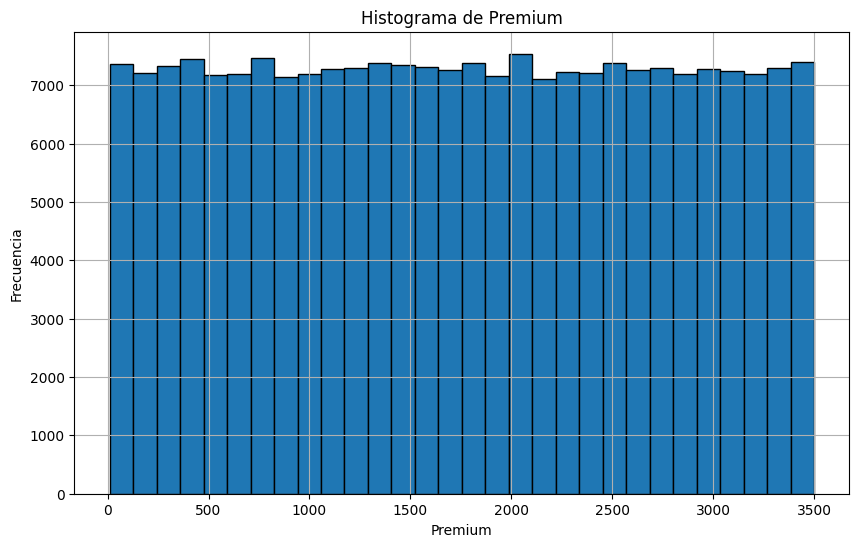

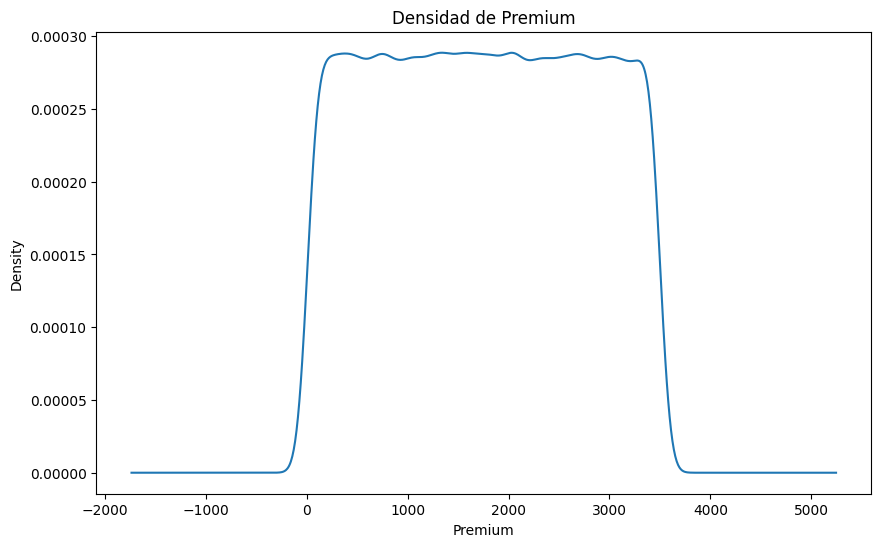

In [34]:
plt.figure(figsize=(10, 6))
df['Premium'].hist(bins=30, edgecolor='black')
plt.title('Histograma de Premium')
plt.xlabel('Premium')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
df['Premium'].plot(kind='density')
plt.title('Densidad de Premium')
plt.xlabel('Premium')
plt.show()


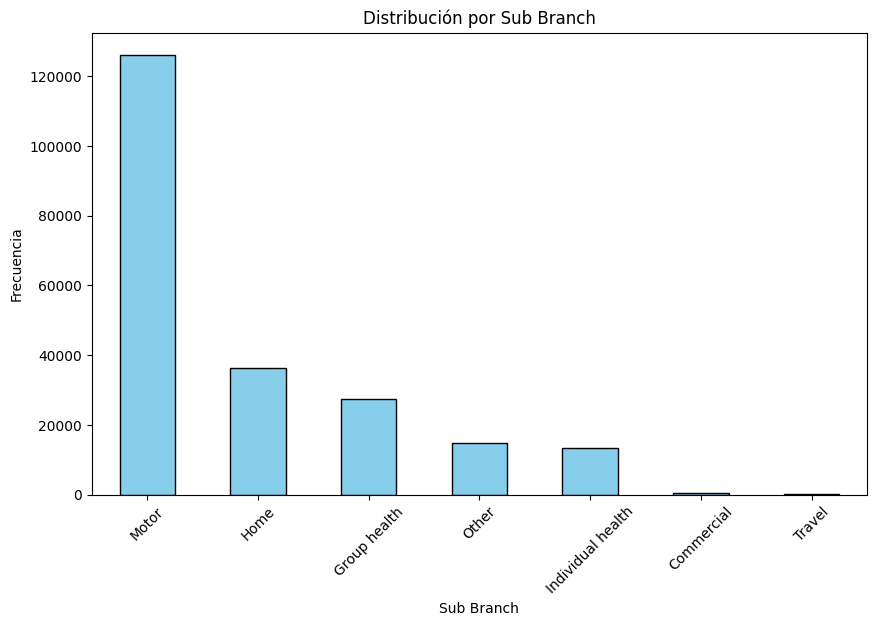

In [36]:
plt.figure(figsize=(10, 6))
df['Sub Branch'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución por Sub Branch')
plt.xlabel('Sub Branch')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


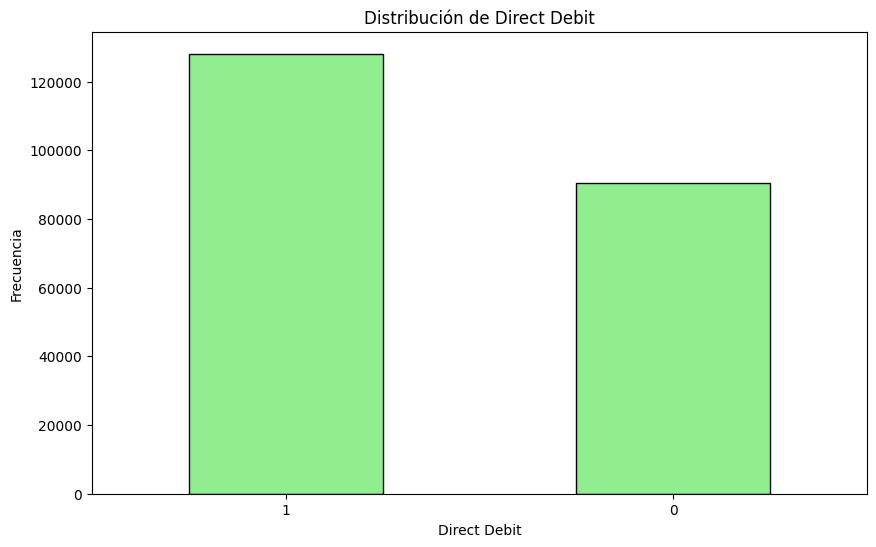

In [37]:
plt.figure(figsize=(10, 6))
df['Direct Debit'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribución de Direct Debit')
plt.xlabel('Direct Debit')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()


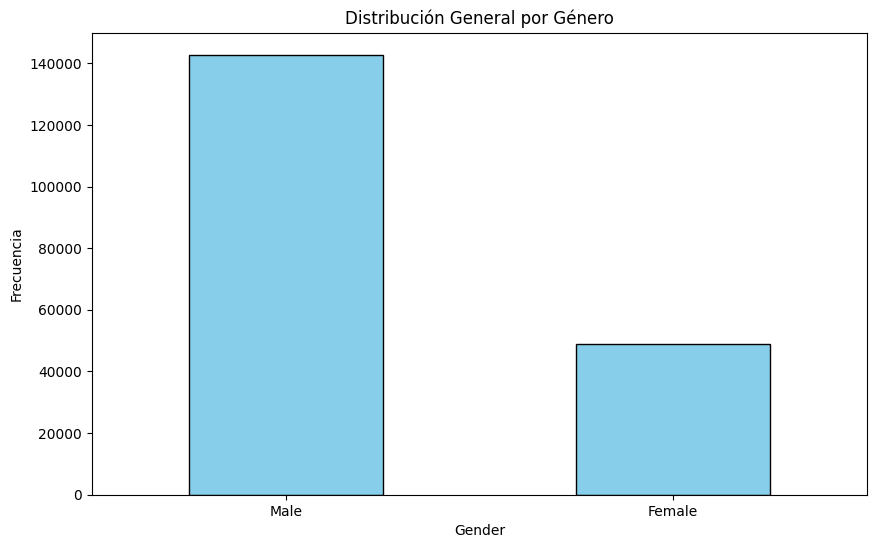

In [42]:
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución General por Género')
plt.xlabel('Gender')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()


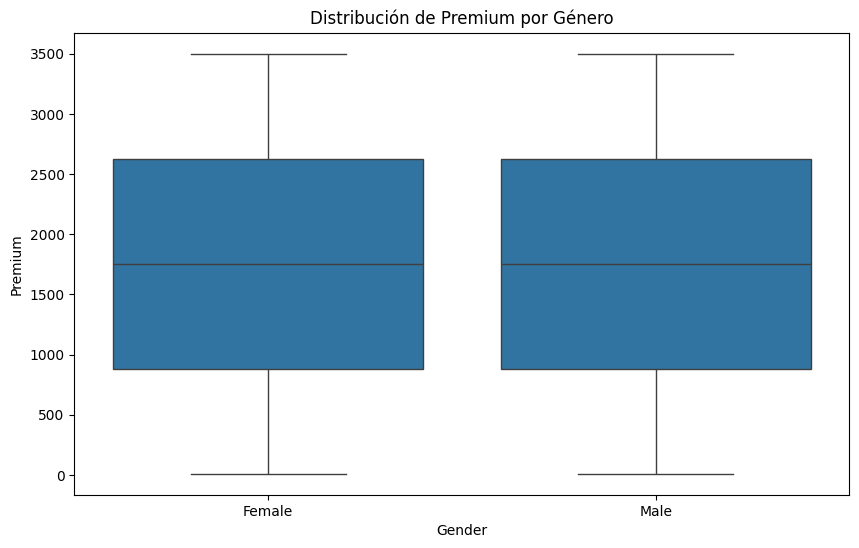

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Premium', data=df)
plt.title('Distribución de Premium por Género')
plt.xlabel('Gender')
plt.ylabel('Premium')
plt.show()


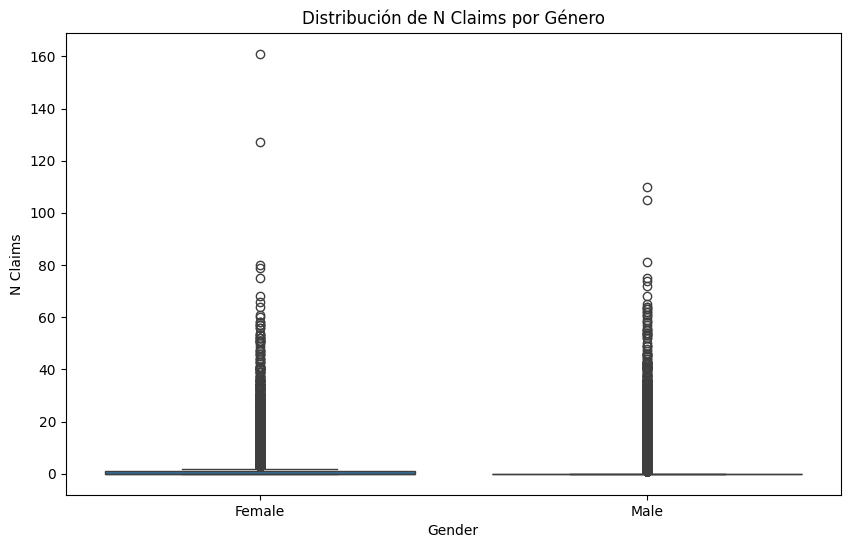

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='N Claims', data=df)
plt.title('Distribución de N Claims por Género')
plt.xlabel('Gender')
plt.ylabel('N Claims')
plt.show()


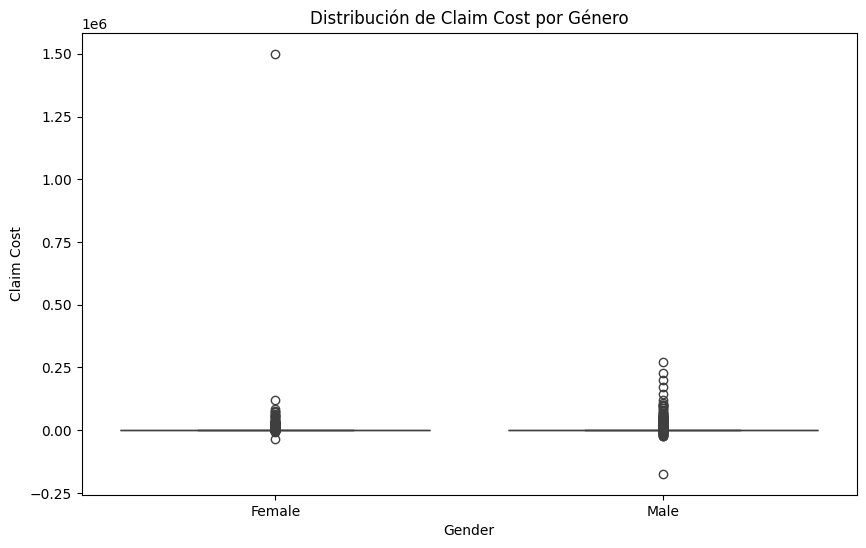

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Claim Cost', data=df)
plt.title('Distribución de Claim Cost por Género')
plt.xlabel('Gender')
plt.ylabel('Claim Cost')
plt.show()


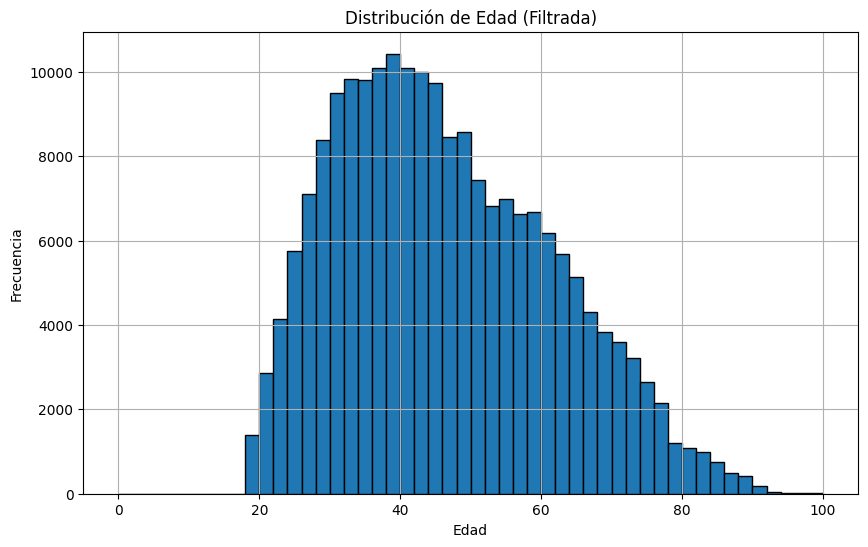

In [49]:
plt.figure(figsize=(10, 6))
df['Age'].hist(bins=range(0, 102, 2), edgecolor='black')
plt.title('Distribución de Edad (Filtrada hasta los 100 años)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


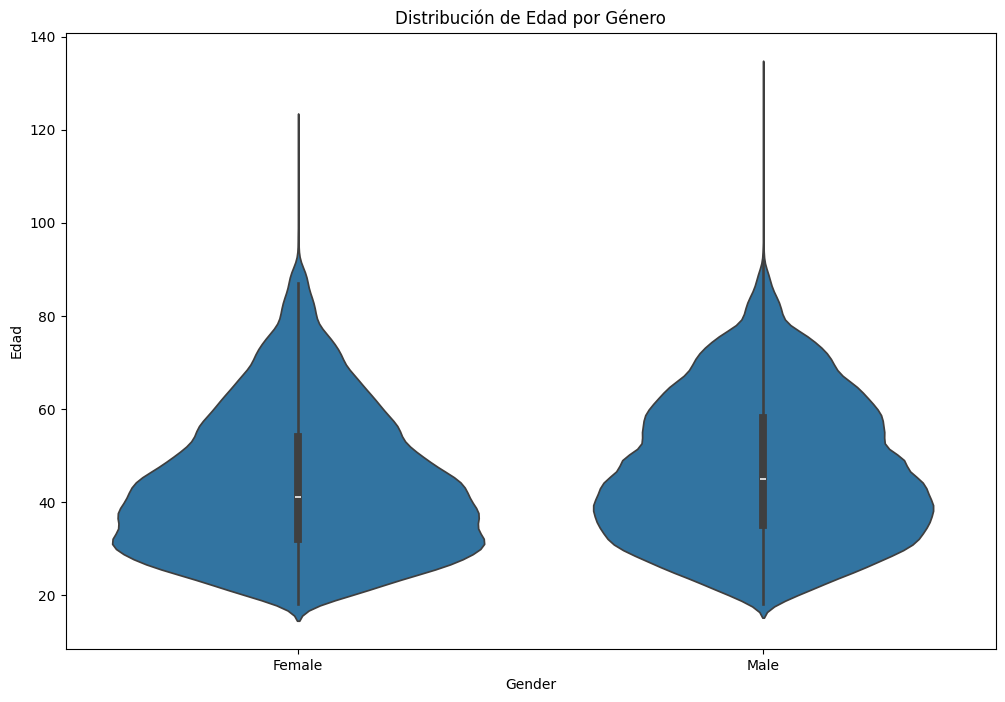

In [53]:
# Gráfico de violín para ver la distribución de edad por género
plt.figure(figsize=(12, 8))
sns.violinplot(x='Gender', y='Age', data=df)
plt.title('Distribución de Edad por Género')
plt.xlabel('Gender')
plt.ylabel('Edad')
plt.show()


# Machine Learning

## Empieza la imputación de valores nulos

In [78]:
df.columns = df.columns.str.strip()


In [79]:
if 'Age Group' in df.columns:
    df = df.drop(columns=['Age Group'])

In [81]:
# Convertir columnas de tipo datetime a numéricas
df['Effective Data'] = pd.to_datetime(df['Effective Data'])
date_columns = df.select_dtypes(include=['datetime64']).columns

for col in date_columns:
    df[col] = (df[col] - df[col].min()).dt.days

# Convertir columnas de rangos de edad a valores numéricos
def convert_age_range(age_range):
    if isinstance(age_range, str) and '-' in age_range:
        start, end = age_range.split('-')
        return (int(start) + int(end)) / 2
    return age_range

df['Age'] = df['Age'].apply(convert_age_range).astype(float)

In [82]:
# Convertir todas las columnas categóricas a numéricas utilizando LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [83]:
# Función para rellenar NaNs utilizando RandomForestRegressor para columnas numéricas
def fill_na_with_rf_regressor(df, col):
    df_notna = df[df[col].notna()]
    df_na = df[df[col].isna()]
    rf = RandomForestRegressor(n_estimators=100, random_state=0)
    rf.fit(df_notna.drop(columns=col), df_notna[col])
    df.loc[df[col].isna(), col] = rf.predict(df_na.drop(columns=col))
    return df

# Función para rellenar NaNs utilizando RandomForestClassifier para columnas categóricas
def fill_na_with_rf_classifier(df, col):
    df_notna = df[df[col].notna()]
    df_na = df[df[col].isna()]
    le = label_encoders[col]
    df_notna[col] = le.fit_transform(df_notna[col].astype(str))
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(df_notna.drop(columns=col), df_notna[col])
    df.loc[df[col].isna(), col] = le.inverse_transform(rf.predict(df_na.drop(columns=col)))
    return df

In [84]:
# Imputar valores faltantes para columnas numéricas
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isna().sum() > 0:
        df = fill_na_with_rf_regressor(df, col)

# Imputar valores faltantes para columnas categóricas
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isna().sum() > 0:
        df = fill_na_with_rf_classifier(df, col)

# Verificar que no haya NaNs
assert df.isna().sum().sum() == 0, "Aún hay NaNs en el DataFrame"

In [86]:
df.isnull().sum()

CustomerId (Anonymized)     0
PolicyId\n(Anonymized)      0
Sub Branch                  0
Branch                      0
Product                     0
Effective Data              0
Premium                     0
Intermediated Policy        0
Contracting Channel         0
Personal Data Protection    0
Direct Debit                0
N Claims                    0
Claim Cost                  0
Person Type                 0
Age                         0
Tenure                      0
Gender                      0
Client Segmentation         0
Client Area                 0
dtype: int64

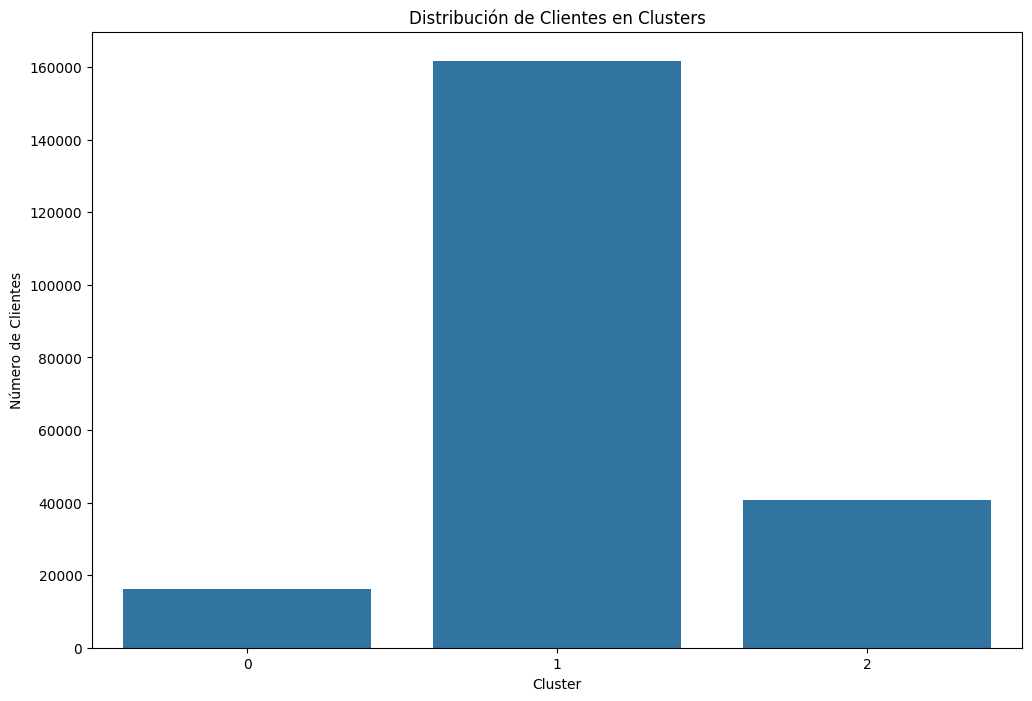

         CustomerId (Anonymized)  PolicyId\n(Anonymized)  Sub Branch  \
Cluster                                                                
0                   64955.539689           107426.670268    3.475229   
1                   67206.938220           107512.140307    3.693902   
2                   84031.202116           117208.060573    1.639710   

           Branch    Product  Effective Data      Premium  \
Cluster                                                     
0        2.038185  40.524955             0.0  1751.235865   
1        2.034310  39.281677             0.0  1753.674094   
2        1.031295  27.091549             0.0  1755.514848   

         Intermediated Policy  Contracting Channel  Personal Data Protection  \
Cluster                                                                        
0                    0.000000             3.000000                  0.890601   
1                    1.000000             1.752936                  0.816843   
2            

In [91]:


# Seleccionar las columnas para la segmentación
columns_for_clustering = [
    'Sub Branch', 'Branch', 'Product', 'Effective Data', 'Premium', 
    'Intermediated Policy', 'Contracting Channel', 'Personal Data Protection', 
    'Direct Debit', 'N Claims', 'Claim Cost', 'Person Type', 'Age', 
    'Tenure', 'Gender', 'Client Segmentation', 'Client Area'
]

data_for_clustering = df[columns_for_clustering]

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Añadir los clusters al dataframe original
df['Cluster'] = clusters

# Visualizar los resultados
plt.figure(figsize=(12, 8))
sns.countplot(x='Cluster', data=df)
plt.title('Distribución de Clientes en Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.show()

# Mostrar un análisis de las características de cada cluster
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)


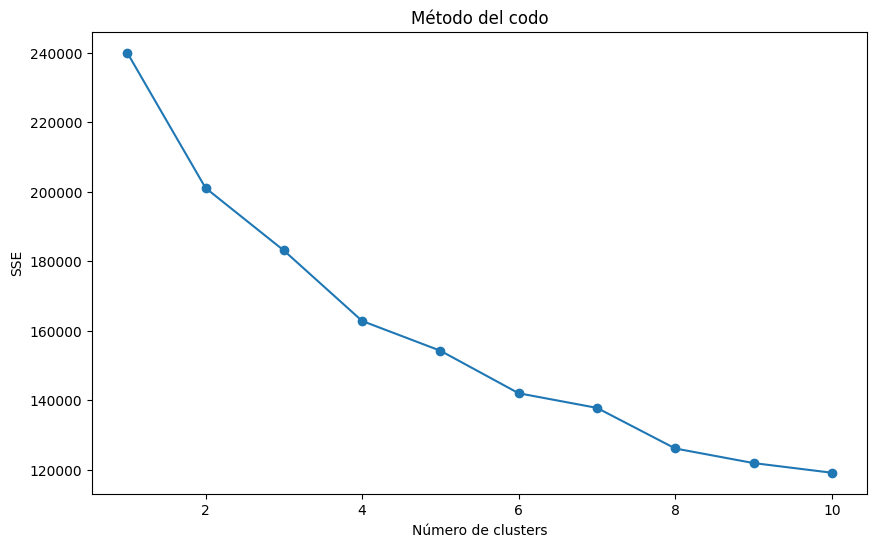

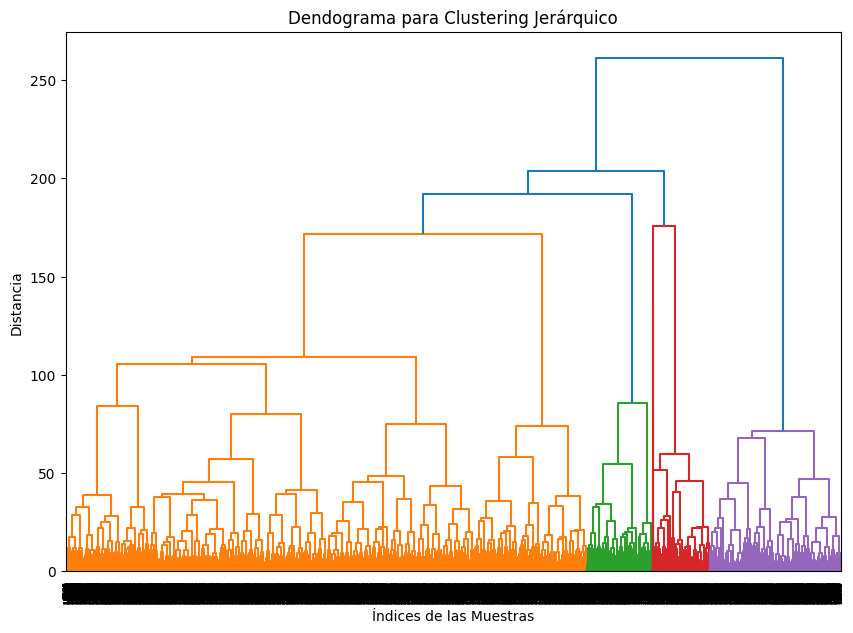

In [97]:
# Muestrear un subconjunto aleatorio de los datos
data_sample = df_no_nans.sample(n=15000, random_state=42)

# Seleccionar las columnas para la segmentación
columns_for_clustering = [
    'Sub Branch', 'Branch', 'Product', 'Effective Data', 'Premium', 
    'Intermediated Policy', 'Contracting Channel', 'Personal Data Protection', 
    'Direct Debit', 'N Claims', 'Claim Cost', 'Person Type', 'Age', 
    'Tenure', 'Gender', 'Client Segmentation', 'Client Area'
]

data_subset = data_sample[columns_for_clustering]

# Estandarizar los datos
scaler = StandardScaler()
data_scaled_subset = scaler.fit_transform(data_subset)

# Método del codo para determinar el número óptimo de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled_subset)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

# Dendograma para clustering jerárquico
linked = linkage(data_scaled_subset, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendograma para Clustering Jerárquico')
plt.xlabel('Índices de las Muestras')
plt.ylabel('Distancia')
plt.show()



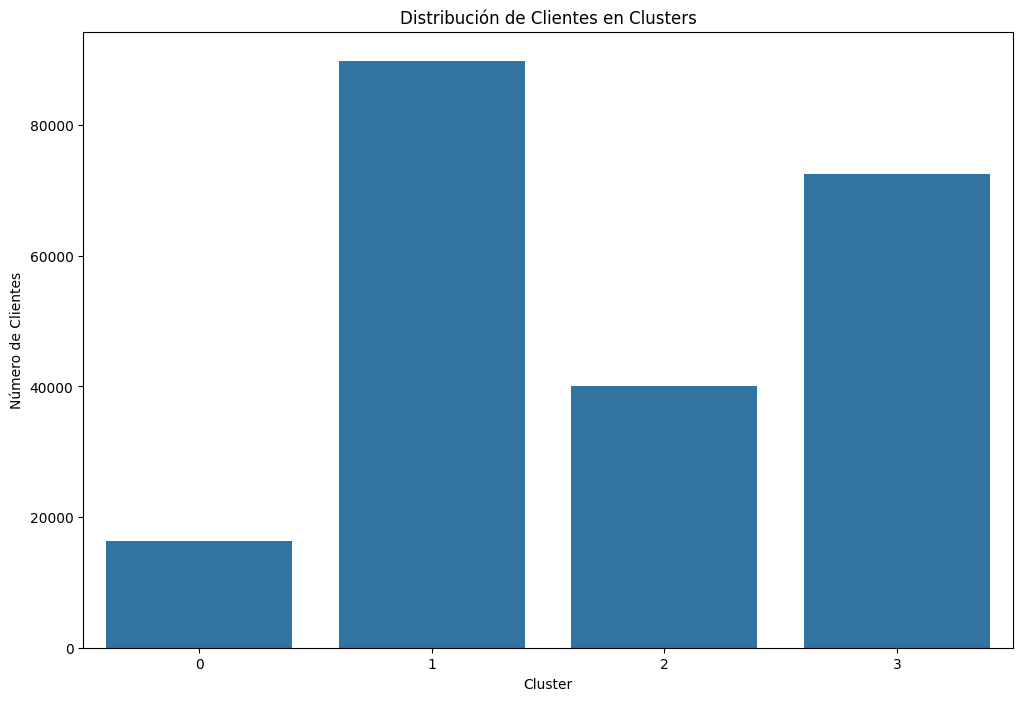

         CustomerId (Anonymized)  PolicyId\n(Anonymized)  Sub Branch  \
Cluster                                                                
0                   64926.271701           107424.788418    3.474633   
1                   65751.888839           107320.447872    3.309138   
2                   84342.143304           117370.508649    1.632980   
3                   68992.023838           107745.721268    4.156041   

           Branch    Product  Effective Data      Premium  \
Cluster                                                     
0        2.037544  40.514079             0.0  1751.040856   
1        2.336388  34.332435             0.0  1754.307624   
2        1.002400  27.374294             0.0  1755.660826   
3        1.667567  45.147962             0.0  1752.869685   

         Intermediated Policy  Contracting Channel  Personal Data Protection  \
Cluster                                                                        
0                    0.000000           

In [98]:
# Seleccionar las columnas para la segmentación
columns_for_clustering = [
    'Sub Branch', 'Branch', 'Product', 'Effective Data', 'Premium', 
    'Intermediated Policy', 'Contracting Channel', 'Personal Data Protection', 
    'Direct Debit', 'N Claims', 'Claim Cost', 'Person Type', 'Age', 
    'Tenure', 'Gender', 'Client Segmentation', 'Client Area'
]

data_for_clustering = df[columns_for_clustering]

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Aplicar K-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Añadir los clusters al dataframe original
df['Cluster'] = clusters

# Visualizar los resultados
plt.figure(figsize=(12, 8))
sns.countplot(x='Cluster', data=df)
plt.title('Distribución de Clientes en Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.show()

# Mostrar un análisis de las características de cada cluster
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)


In [99]:
# Convertir el análisis de clusters en un DataFrame
cluster_analysis_df = cluster_analysis.reset_index()

# Mostrar el DataFrame
cluster_analysis_df

,Cluster,CustomerId (Anonymized),PolicyId\n(Anonymized),Sub Branch,Branch,Product,Effective Data,Premium,Intermediated Policy,Contracting Channel,Personal Data Protection,Direct Debit,N Claims,Claim Cost,Person Type,Age,Tenure,Gender,Client Segmentation,Client Area
0,0,64926.271701,107424.788418,3.474633,2.037544,40.514079,0.0,1751.040856,0.000000,3.000000,0.891540,0.001656,0.763987,695.741036,0.939145,48.010198,5.954113,0.799276,1.061039,0.509171
1,1,65751.888839,107320.447872,3.309138,2.336388,34.332435,0.0,1754.307624,1.000000,0.647320,0.754660,0.687476,0.354373,361.765904,0.987361,47.468635,6.131520,0.800586,1.071717,0.412002
2,2,84342.143304,117370.508649,1.632980,1.002400,27.374294,0.0,1755.660826,0.916912,1.176599,1.992101,0.001950,2.530945,482.131160,0.999150,42.405328,3.014985,0.980478,1.635630,1.995901
3,3,68992.023838,107745.721268,4.156041,1.667567,45.147962,0.0,1752.869685,0.999972,3.114129,0.895384,0.913983,0.496075,738.014958,0.814192,46.338388,4.998263,0.999766,1.046007,0.381115


Cluster 0: Mayor costo promedio de reclamos y edad promedio alta.

Cluster 1: Políticas intermediadas al 100%, costo de reclamos más bajo.

Cluster 2: Edad promedio más baja y mayor número de reclamos.

Cluster 3: Alta intermediación y costos de reclamos más altos en comparación con otros clusters.